In [ ]:
!pip install spotify
!pip install spotipy
!pip install urllib3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
import json

In [ ]:
# import libraries
import spotipy
from spotipy import SpotifyClientCredentials, util

In [ ]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id="XXXX",
    client_secret="XXXX"))

In [ ]:
response = requests.get("https://open.spotify.com/artist/4YRxDV8wJFPHPTeXepOstw")
response

<Response [200]>

In [ ]:
results = sp.search(q="Arjit Singh", limit = 25)

In [ ]:
results.keys()

dict_keys(['tracks'])

In [ ]:
results["tracks"].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [ ]:
results["tracks"]["href"]

'https://api.spotify.com/v1/search?query=Arjit+Singh&type=track&offset=0&limit=25'

In [ ]:
results["tracks"]["items"][20]["name"]

'Ghungroo (From "War")'

In [ ]:
results["tracks"]["items"][20]["artists"]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6Mv8GjQa7LKUGCAqa9qqdb'},
  'href': 'https://api.spotify.com/v1/artists/6Mv8GjQa7LKUGCAqa9qqdb',
  'id': '6Mv8GjQa7LKUGCAqa9qqdb',
  'name': 'Vishal-Shekhar',
  'type': 'artist',
  'uri': 'spotify:artist:6Mv8GjQa7LKUGCAqa9qqdb'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/4YRxDV8wJFPHPTeXepOstw'},
  'href': 'https://api.spotify.com/v1/artists/4YRxDV8wJFPHPTeXepOstw',
  'id': '4YRxDV8wJFPHPTeXepOstw',
  'name': 'Arijit Singh',
  'type': 'artist',
  'uri': 'spotify:artist:4YRxDV8wJFPHPTeXepOstw'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/19LIHDDSHBD5NyYHI3gpzB'},
  'href': 'https://api.spotify.com/v1/artists/19LIHDDSHBD5NyYHI3gpzB',
  'id': '19LIHDDSHBD5NyYHI3gpzB',
  'name': 'Shilpa Rao',
  'type': 'artist',
  'uri': 'spotify:artist:19LIHDDSHBD5NyYHI3gpzB'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/0m3D4grap8VFSzbJMqgNVk'},
  'href': 'https://api.spotify.com

In [ ]:
# to make my playlist
my_playlist = sp.user_playlist_tracks(user="spotify", playlist_id="spotify:playlist:XXXX")

In [ ]:
my_playlist["items"][0]["track"]["uri"]

'spotify:track:59JemC1a4KDC1WxNAt7Zpt'

In [ ]:
sp.audio_features("spotify:track:59JemC1a4KDC1WxNAt7Zpt")

[{'danceability': 0.512,
  'energy': 0.479,
  'key': 4,
  'loudness': -10.765,
  'mode': 0,
  'speechiness': 0.0378,
  'acousticness': 0.765,
  'instrumentalness': 1.79e-05,
  'liveness': 0.0648,
  'valence': 0.856,
  'tempo': 97.205,
  'type': 'audio_features',
  'id': '59JemC1a4KDC1WxNAt7Zpt',
  'uri': 'spotify:track:59JemC1a4KDC1WxNAt7Zpt',
  'track_href': 'https://api.spotify.com/v1/tracks/59JemC1a4KDC1WxNAt7Zpt',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/59JemC1a4KDC1WxNAt7Zpt',
  'duration_ms': 303960,
  'time_signature': 4}]

# ***Now, Its time to make my personal playlist into groups.***

In [ ]:
# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = '1PUl113RImF9a5LU0XCMKM')
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

In [ ]:
# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

In [ ]:
# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'time_signature', 'track_href', 'type', 'uri', 'mode', 'duration_ms']
features_df = pd.DataFrame(features).drop(cols_to_drop, axis=1)

In [ ]:
features_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.512,0.479,-10.765,0.0378,0.7650,0.000018,0.0648,0.856,97.205
1,0.547,0.560,-10.504,0.0421,0.8480,0.000008,0.0700,0.500,92.307
2,0.489,0.575,-11.640,0.0470,0.5330,0.000008,0.2380,0.579,100.212
3,0.548,0.506,-13.684,0.0495,0.4920,0.000442,0.1890,0.641,85.628
4,0.486,0.615,-13.277,0.0542,0.4450,0.000951,0.3750,0.848,92.277
5,0.477,0.223,-12.797,0.0294,0.9340,0.032400,0.1990,0.242,78.100
6,0.511,0.597,-13.859,0.0858,0.0155,0.594000,0.0406,0.877,112.860
7,0.606,0.601,-5.576,0.0283,0.7960,0.000511,0.1270,0.453,125.961
8,0.528,0.449,-6.250,0.0250,0.7850,0.000000,0.1220,0.317,94.058
9,0.461,0.481,-6.389,0.0327,0.7890,0.000001,0.1270,0.262,199.807


In [ ]:
features_df.describe() # we can see the diff only in loudness and tempo

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,28.000000,28.000000,28.000000,28.000000,28.00000,28.000000,28.000000,28.000000,28.000000
mean,0.560607,0.560036,-8.597857,0.047475,0.54735,0.022551,0.151454,0.491500,116.978179
std,0.137154,0.164610,3.131242,0.023819,0.26744,0.112159,0.067729,0.238431,27.656875
min,0.247000,0.223000,-13.859000,0.024600,0.01550,0.000000,0.040600,0.158000,78.100000
25%,0.493500,0.476000,-10.983750,0.031675,0.37775,0.000003,0.111500,0.312000,97.806500
50%,0.529500,0.558000,-8.263000,0.037400,0.56750,0.000017,0.133000,0.476500,107.448000
75%,0.613000,0.612750,-6.354250,0.056575,0.78600,0.000310,0.190500,0.598250,126.344750
max,0.836000,0.911000,-2.974000,0.106000,0.93400,0.594000,0.375000,0.919000,199.807000


In [ ]:
# Extracting song and artist names
songs = [x['track']['name'] for x in tracks['items']]
artists = [x['track']['artists'] for x in tracks['items']]

In [ ]:
songs

['Tujhe Dekha To',
 'Ghar Aaja Pardesi',
 'Ho Gaya Hai Tujhko To Pyar Sajna',
 'Humko Humise Chura Lo',
 'Zinda Rehti Hain Unki Mohabbatein',
 'Mohabbatein Love Themes (Instrumental)',
 'Rhythms Of Mohabbatein (Instrumental)',
 'Hawayein',
 'Tum Hi Ho (From "Aashiqui 2")',
 'Phir Mohabbat (From "Murder 2")',
 'Raabta (From "Agent Vinod")',
 'Soch Na Sake (From "Airlift")',
 'Chal Wahan Jaate Hain (From "Chal Wahan Jaate Hain")',
 'Agar Tum Saath Ho (From "Tamasha")',
 'Dil Ke Paas (From "Wajah Tum Ho")',
 'Tujh Mein Rab Dikhta Hai - Ii',
 'Kaun Tujhe (From "M.S.Dhoni - The Untold Story")',
 'Chahun Main Ya Naa (From "Aashiqui 2")',
 'Mere Haath Mein',
 'Do Pal',
 'Tere Liye',
 'Chand Sifarish',
 'Baby Doll (From "Ragini Mms 2")',
 'Kala Chashma',
 'Baby Doll',
 'Jeeye To Jeeye Kaise - Jhankar Beats',
 'Tu Hi Re - Bombay / Soundtrack Version',
 'Pal Pal Dil Ke Paas - From "Blackmail"']

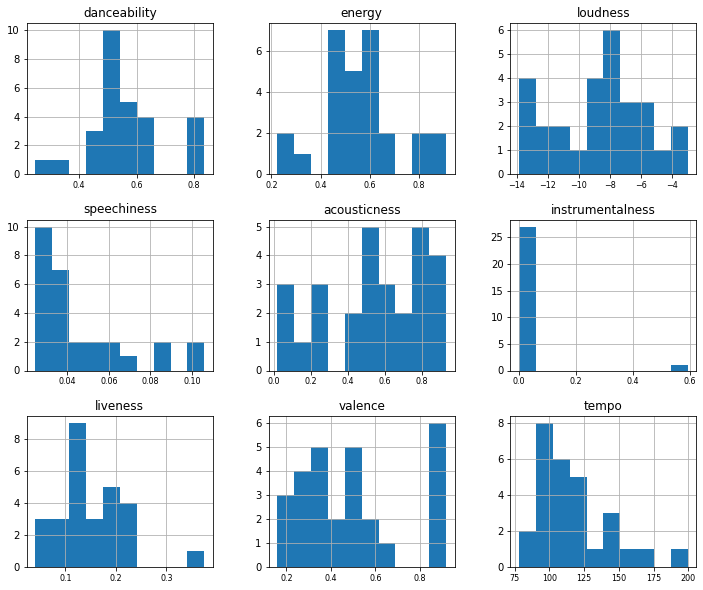

In [ ]:
features_df.hist(xlabelsize=8, figsize=(12,10));

In [ ]:
# Scaling
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
 
# 2. initialize the transformer (optionally, set parameters)
#my_min_max = MinMaxScaler(feature_range=(0,1))
 
# 3. fit the transformer to the data
#my_min_max.fit(features_df)
 
# 4. use the transformer to transform the data
#scaled_audio_features = my_min_max.transform(features_df)
 
# 5. reconvert the transformed data back to a DataFrame
#pd.DataFrame(scaled_audio_features,index=features_df.index,columns=features_df.columns)

In [ ]:
# MinMaxScaler() for 2 columns
for col in ['loudness', 'tempo']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))

In [ ]:
features_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.512,0.479,0.284244,0.0378,0.7650,0.000018,0.0648,0.856,0.156975
1,0.547,0.560,0.308222,0.0421,0.8480,0.000008,0.0700,0.500,0.116731
2,0.489,0.575,0.203859,0.0470,0.5330,0.000008,0.2380,0.579,0.181682
3,0.548,0.506,0.016077,0.0495,0.4920,0.000442,0.1890,0.641,0.061853
4,0.486,0.615,0.053468,0.0542,0.4450,0.000951,0.3750,0.848,0.116485
5,0.477,0.223,0.097565,0.0294,0.9340,0.032400,0.1990,0.242,0.000000
6,0.511,0.597,0.000000,0.0858,0.0155,0.594000,0.0406,0.877,0.285604
7,0.606,0.601,0.760955,0.0283,0.7960,0.000511,0.1270,0.453,0.393248
8,0.528,0.449,0.699035,0.0250,0.7850,0.000000,0.1220,0.317,0.131118
9,0.461,0.481,0.686266,0.0327,0.7890,0.000001,0.1270,0.262,1.000000


In [ ]:
features_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,28.000000,28.000000,28.000000,28.000000,28.00000,28.000000,28.000000,28.000000,28.000000
mean,0.560607,0.560036,0.483339,0.047475,0.54735,0.022551,0.151454,0.491500,0.319441
std,0.137154,0.164610,0.287666,0.023819,0.26744,0.112159,0.067729,0.238431,0.227241
min,0.247000,0.223000,0.000000,0.024600,0.01550,0.000000,0.040600,0.158000,0.000000
25%,0.493500,0.476000,0.264148,0.031675,0.37775,0.000003,0.111500,0.312000,0.161918
50%,0.529500,0.558000,0.514102,0.037400,0.56750,0.000017,0.133000,0.476500,0.241136
75%,0.613000,0.612750,0.689458,0.056575,0.78600,0.000310,0.190500,0.598250,0.396401
max,0.836000,0.911000,1.000000,0.106000,0.93400,0.594000,0.375000,0.919000,1.000000


In [ ]:
# Determining the cluster size with Inertia/elbow Method
from sklearn.cluster import KMeans
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

In [ ]:
score_list

[6.19886041092505,
 4.243645479036576,
 3.432264548373639,
 2.808651252983438,
 2.25024865570656,
 1.9698892595594657,
 1.6963185974277508,
 1.4177041174086853]

[Text(0, 0.5, 'Inertia'), Text(0.5, 0, 'Cluster Size')]

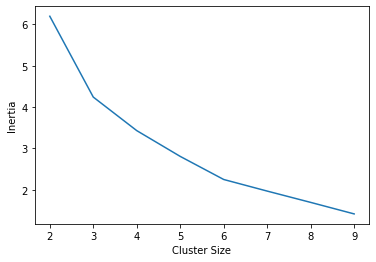

In [ ]:
# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

In [ ]:
#silhouette coefficient
from sklearn.metrics import silhouette_score
seed = 0

sil_scores = [] 
for i in range(2,10):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(features_df)
    sil_scores.append(silhouette_score(features_df, km.labels_))

In [ ]:
sil_scores

[0.34174574131939683,
 0.32597550470372644,
 0.27563218471381573,
 0.29189383292677634,
 0.2811859174698261,
 0.29293916352111166,
 0.2824502828895287,
 0.2985393001235191]

[Text(0, 0.5, 'Silhouette score'), Text(0.5, 0, 'Cluster Size')]

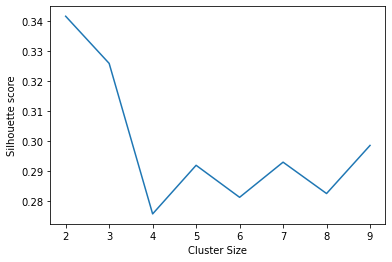

In [ ]:
pd.DataFrame(sil_scores, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Silhouette score")

In [ ]:
# Training and Predicting
kmeans_model = KMeans(n_clusters=4, random_state=3).fit(features_df)
preds = kmeans_model.predict(features_df)

In [ ]:
preds

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 3,
       3, 3, 3, 3, 0, 2], dtype=int32)

In [ ]:
# Extracting song and artist names
songs = [x['track']['name'] for x in tracks['items']]
artists = [x['track']['artists'] for x in tracks['items']]

# Concatenating multiple artist names
artist_list = []
for group in artists:
    artist_group = []
    for person in group:
        artist_group.append(person['name'])
    artist_list.append(', '.join(artist_group))

# Adding predictions to dataframe
features_df['cluster'] = preds

# Adding Songs name and artists to dataframe
features_df['songs'] = songs
features_df['artists'] = artist_list

# Grouping clusters to see the averages
clusters = features_df \
    .groupby('cluster') \
    .agg('mean')

In [ ]:
artist_list

['Lata Mangeshkar, Kumar Sanu',
 'Pamela Chopra, Manpreet Kaur',
 'Lata Mangeshkar, Udit Narayan',
 'Jatin-Lalit, Lata Mangeshkar, Udit Narayan, Anand Bakshi',
 'Jatin-Lalit, Lata Mangeshkar, Anand Bakshi',
 'Jatin-Lalit, Anand Bakshi',
 'Jatin-Lalit, Anand Bakshi',
 'Pritam, Arijit Singh',
 'Arijit Singh',
 'Mohammed Irfan, Arijit Singh, Saim Bhat',
 'Arijit Singh',
 'Amaal Mallik, Arijit Singh, Tulsi Kumar',
 'Arijit Singh',
 'Alka Yagnik, Arijit Singh',
 'Arijit Singh, Tulsi Kumar, Neuman Pinto',
 'Shreya Ghoshal',
 'Palak Muchhal',
 'Palak Muchhal, Arijit Singh',
 'Jatin-Lalit, Sonu Nigam, Sunidhi Chauhan, Prasoon Joshi',
 'Madan Mohan, Lata Mangeshkar, Sonu Nigam, Javed Akhtar',
 'Madan Mohan, Lata Mangeshkar, Roop Kumar Rathod, Javed Akhtar',
 'Jatin-Lalit, Shaan, Kailash Kher, Prasoon Joshi',
 'Meet Bros Anjjan, Kanika Kapoor',
 'Amar Arshi, Badshah, Neha Kakkar, Indeep Bakshi, Prem & Hardeep',
 'Meet Bros Anjjan, Kanika Kapoor',
 'Kumar Sanu, S. P. Balasubrahmanyam, Anuradha Pa

In [ ]:
clusters

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.513571,0.522714,0.163305,0.053757,0.423357,0.085086,0.158914,0.679714,0.159170
1,0.480667,0.567500,0.645874,0.034117,0.654500,0.000161,0.146833,0.348667,0.649830
2,0.528200,0.450700,0.433551,0.032080,0.744600,0.003475,0.132130,0.324300,0.250932
3,0.787200,0.822000,0.835921,0.085500,0.197860,0.000021,0.185200,0.733800,0.284370


In [ ]:
features_df[features_df['cluster'] == 0]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,songs,artists
0,0.512,0.479,0.284244,0.0378,0.7650,0.000018,0.0648,0.856,0.156975,0,Tujhe Dekha To,"Lata Mangeshkar, Kumar Sanu"
2,0.489,0.575,0.203859,0.0470,0.5330,0.000008,0.2380,0.579,0.181682,0,Ho Gaya Hai Tujhko To Pyar Sajna,"Lata Mangeshkar, Udit Narayan"
3,0.548,0.506,0.016077,0.0495,0.4920,0.000442,0.1890,0.641,0.061853,0,Humko Humise Chura Lo,"Jatin-Lalit, Lata Mangeshkar, Udit Narayan, An..."
4,0.486,0.615,0.053468,0.0542,0.4450,0.000951,0.3750,0.848,0.116485,0,Zinda Rehti Hain Unki Mohabbatein,"Jatin-Lalit, Lata Mangeshkar, Anand Bakshi"
6,0.511,0.597,0.000000,0.0858,0.0155,0.594000,0.0406,0.877,0.285604,0,Rhythms Of Mohabbatein (Instrumental),"Jatin-Lalit, Anand Bakshi"
18,0.554,0.606,0.142122,0.0722,0.5780,0.000183,0.1100,0.584,0.130001,0,Mere Haath Mein,"Jatin-Lalit, Sonu Nigam, Sunidhi Chauhan, Pras..."
26,0.495,0.281,0.443362,0.0298,0.1350,0.000000,0.0950,0.373,0.181592,0,Tu Hi Re - Bombay / Soundtrack Version,"Hariharan, Kavita Krishnamurthy"


In [ ]:
features_df[features_df['cluster'] == 1]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,songs,artists
7,0.606,0.601,0.760955,0.0283,0.796,0.000511,0.127,0.453,0.393248,1,Hawayein,"Pritam, Arijit Singh"
9,0.461,0.481,0.686266,0.0327,0.789,0.000001,0.127,0.262,1.000000,1,"Phir Mohabbat (From ""Murder 2"")","Mohammed Irfan, Arijit Singh, Saim Bhat"
11,0.505,0.667,0.740652,0.0323,0.597,0.000000,0.213,0.516,0.604961,1,"Soch Na Sake (From ""Airlift"")","Amaal Mallik, Arijit Singh, Tulsi Kumar"
12,0.510,0.612,0.572347,0.0372,0.412,0.000016,0.156,0.193,0.591100,1,"Chal Wahan Jaate Hain (From ""Chal Wahan Jaate ...",Arijit Singh
14,0.555,0.488,0.532108,0.0366,0.698,0.000001,0.112,0.297,0.564249,1,"Dil Ke Paas (From ""Wajah Tum Ho"")","Arijit Singh, Tulsi Kumar, Neuman Pinto"
19,0.247,0.556,0.582912,0.0376,0.635,0.000436,0.146,0.371,0.745421,1,Do Pal,"Madan Mohan, Lata Mangeshkar, Sonu Nigam, Jave..."


In [ ]:
features_df[features_df['cluster'] == 2]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,songs,artists
1,0.547,0.560,0.308222,0.0421,0.848,0.000008,0.0700,0.500,0.116731,2,Ghar Aaja Pardesi,"Pamela Chopra, Manpreet Kaur"
5,0.477,0.223,0.097565,0.0294,0.934,0.032400,0.1990,0.242,0.000000,2,Mohabbatein Love Themes (Instrumental),"Jatin-Lalit, Anand Bakshi"
8,0.528,0.449,0.699035,0.0250,0.785,0.000000,0.1220,0.317,0.131118,2,"Tum Hi Ho (From ""Aashiqui 2"")",Arijit Singh
10,0.657,0.581,0.528342,0.0298,0.700,0.000017,0.1160,0.320,0.328149,2,"Raabta (From ""Agent Vinod"")",Arijit Singh
13,0.562,0.519,0.469913,0.0326,0.557,0.000268,0.1720,0.415,0.368303,2,"Agar Tum Saath Ho (From ""Tamasha"")","Alka Yagnik, Arijit Singh"
15,0.334,0.300,0.137804,0.0377,0.863,0.000002,0.1950,0.158,0.566738,2,Tujh Mein Rab Dikhta Hai - Ii,Shreya Ghoshal
16,0.531,0.431,0.452182,0.0370,0.868,0.000025,0.1270,0.190,0.245590,2,"Kaun Tujhe (From ""M.S.Dhoni - The Untold Story"")",Palak Muchhal
17,0.644,0.517,0.657051,0.0273,0.521,0.000003,0.0905,0.259,0.236683,2,"Chahun Main Ya Naa (From ""Aashiqui 2"")","Palak Muchhal, Arijit Singh"
20,0.525,0.460,0.483693,0.0246,0.826,0.002020,0.1390,0.330,0.163565,2,Tere Liye,"Madan Mohan, Lata Mangeshkar, Roop Kumar Ratho..."
27,0.477,0.467,0.501700,0.0353,0.544,0.000002,0.0908,0.512,0.352445,2,"Pal Pal Dil Ke Paas - From ""Blackmail""",Kishore Kumar


In [ ]:
features_df[features_df['cluster'] == 3]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,songs,artists
21,0.829,0.665,0.526504,0.0868,0.2420,0.000017,0.123,0.861,0.361056,3,Chand Sifarish,"Jatin-Lalit, Shaan, Kailash Kher, Prasoon Joshi"
22,0.836,0.839,1.000000,0.1060,0.2750,0.000007,0.181,0.507,0.212740,3,"Baby Doll (From ""Ragini Mms 2"")","Meet Bros Anjjan, Kanika Kapoor"
23,0.801,0.856,0.884336,0.0650,0.0984,0.000066,0.228,0.919,0.229453,3,Kala Chashma,"Amar Arshi, Badshah, Neha Kakkar, Indeep Baksh..."
24,0.836,0.839,1.000000,0.1060,0.2750,0.000007,0.181,0.507,0.212740,3,Baby Doll,"Meet Bros Anjjan, Kanika Kapoor"
25,0.634,0.911,0.768764,0.0637,0.0989,0.000006,0.213,0.875,0.405860,3,Jeeye To Jeeye Kaise - Jhankar Beats,"Kumar Sanu, S. P. Balasubrahmanyam, Anuradha P..."
